In [97]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
df = web.DataReader('GME', data_source='yahoo', start='2019-01-01', end='2021-03-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,13.180000,12.420000,12.450000,13.070000,2124200.0,12.641105
2019-01-03,13.260000,12.690000,12.980000,12.970000,1750400.0,12.544387
2019-01-04,15.290000,13.700000,14.030000,15.240000,11915700.0,14.739896
2019-01-07,15.810000,14.940000,15.110000,15.480000,4718000.0,14.972020
2019-01-08,15.890000,15.150000,15.500000,15.810000,3443800.0,15.291192
...,...,...,...,...,...,...
2021-02-23,46.230000,40.000000,44.970001,44.970001,7565200.0,44.970001
2021-02-24,91.709999,44.700001,44.700001,91.709999,83111700.0,91.709999
2021-02-25,184.679993,101.000000,169.559998,108.730003,150308800.0,108.730003


In [74]:
#we get number and columns 
df.shape

(544, 6)

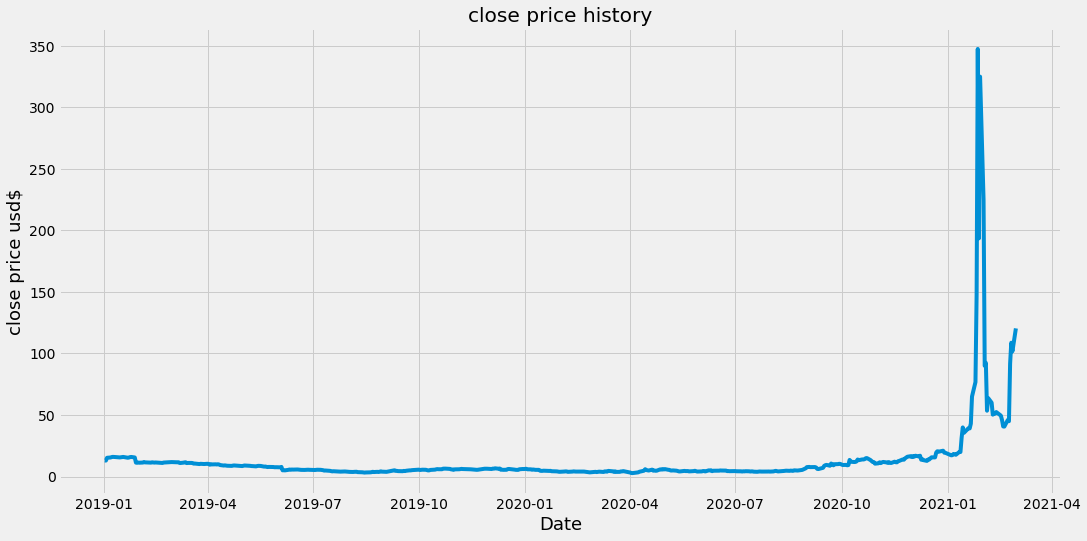

In [75]:
#visualize closing price 
plt.figure(figsize =(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price usd$', fontsize=18)
plt.show()

In [76]:
#new dataframe with close cloumn
data = df.filter(['Close'])
#converting df to numpy array
dataset = data.values
train_data_len = math.ceil(len(dataset)*.8)
train_data_len

436

In [77]:
#scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.97931579e-02],
       [2.95030606e-02],
       [3.60883046e-02],
       [3.67845413e-02],
       [3.77418703e-02],
       [3.82350359e-02],
       [3.81770175e-02],
       [3.78579097e-02],
       [3.72487019e-02],
       [3.69295913e-02],
       [3.73647413e-02],
       [3.76258308e-02],
       [3.80899886e-02],
       [3.61753362e-02],
       [3.67845413e-02],
       [3.77128597e-02],
       [3.80029570e-02],
       [3.68425624e-02],
       [2.46003874e-02],
       [2.43683085e-02],
       [2.47744480e-02],
       [2.44843479e-02],
       [2.48614769e-02],
       [2.60798925e-02],
       [2.52676163e-02],
       [2.51515769e-02],
       [2.48034585e-02],
       [2.46584085e-02],
       [2.53836558e-02],
       [2.51515769e-02],
       [2.47454374e-02],
       [2.50355374e-02],
       [2.43683085e-02],
       [2.43683085e-02],
       [2.38751401e-02],
       [2.48614769e-02],
       [2.53836558e-02],
       [2.56447453e-02],
       [2.57317742e-02],
       [2.58188031e-02],


In [78]:
#create training dataset
train_data = scaled_data[0:train_data_len, :]
x_train =[]
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train, y_train)
 


[array([0.02979316, 0.02950306, 0.0360883 , 0.03678454, 0.03774187,
       0.03823504, 0.03817702, 0.03785791, 0.0372487 , 0.03692959,
       0.03736474, 0.03762583, 0.03808999, 0.03617534, 0.03678454,
       0.03771286, 0.03800296, 0.03684256, 0.02460039, 0.02436831,
       0.02477445, 0.02448435, 0.02486148, 0.02607989, 0.02526762,
       0.02515158, 0.02480346, 0.02465841, 0.02538366, 0.02515158,
       0.02474544, 0.02503554, 0.02436831, 0.02436831, 0.02387514,
       0.02486148, 0.02538366, 0.02564475, 0.02573177, 0.0258188 ,
       0.02596385, 0.02544167, 0.02552871, 0.02541267, 0.0254997 ,
       0.02370108, 0.02454237, 0.02515158, 0.02547068, 0.02364306,
       0.02396217, 0.02399118, 0.02367207, 0.02233762, 0.02248267,
       0.02219257, 0.02129326, 0.02190247, 0.02172841, 0.02143831])] [0.021351279874587695]


In [79]:
#convert x_train and y_train dataset to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [80]:
#reshaping data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(376, 60, 1)

In [81]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [82]:
#complie model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [83]:
#train the model
model.fit(x_train, y_train, batch_size= 1, epochs =1)

376/376 [==============================] - 11s 21ms/step - loss: 4.1738e-05


In [84]:
#create the testing dataset
#create a new array containing scaled values form index 1543 to 2003
test_data = scaled_data[train_data_len - 60: ,:]
#create data sets
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [85]:
#convert data to numpy array
x_test = np.array(x_test)

In [86]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [87]:
#get the models predicted price values
predictions  = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [93]:
#get RMSE (root mean squared error)
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

47.78028464231263

**bold text** #plot the data

---



valid['Predictions'] = predictions

 #vizualise

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD', fontsize =18 )
plt.plot(train['Close'])
plt.plot(vaid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


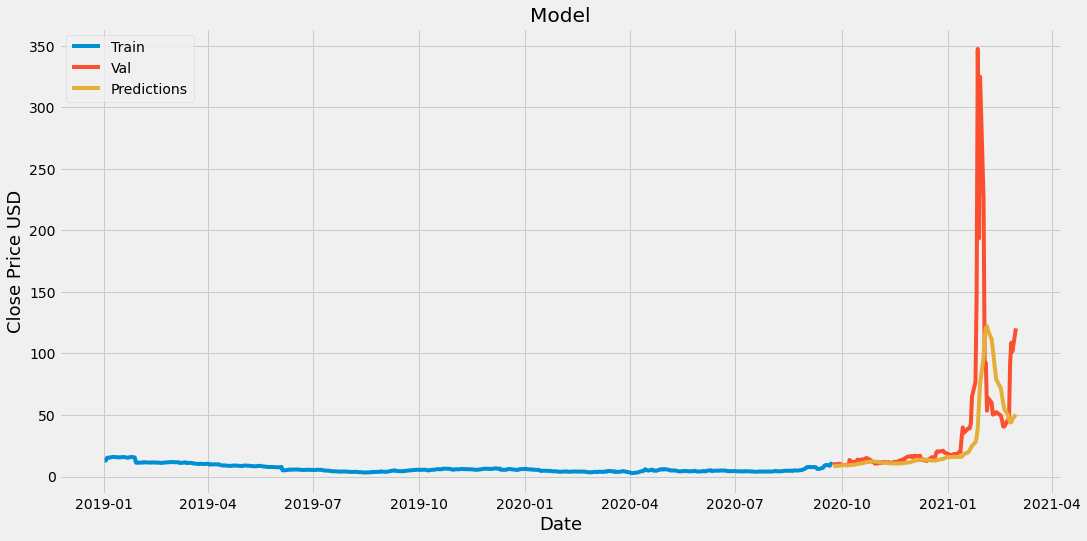

In [94]:
train = data[:train_data_len]
valid = data[train_data_len:]

valid['Predictions'] = predictions
 #vizualise

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD', fontsize =18 )
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'upper left')
plt.show()

In [95]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2020-09-24,9.140000,8.256382
2020-09-25,10.020000,8.442260
2020-09-28,10.090000,8.622590
2020-09-29,10.350000,8.791704
2020-09-30,10.200000,8.956164
...,...,...
2021-02-23,44.970001,46.801785
2021-02-24,91.709999,43.956985
2021-02-25,108.730003,44.050503
